In [8]:
exp_path = "/mnt/e/"
systems = [
    "Experiment_nginx_energy",
    "Experiment_7z_energy",
    "Experiment_x264_energy",
    "Experiment_lrzip_energy",
    "Experiment_HSQLDB_energy",
    "Experiment_PostgreSQL_pervolution_energy",
    "Experiment_VP8_pervolution_energy",
    "Experiment_Apache_energy"
]

systems = [
    "Experiment_7z_energy",
    "Experiment_lrzip_energy",
    "Experiment_nginx_energy",
    "Experiment_PostgreSQL_pervolution_energy",
    "Experiment_VP8_pervolution_energy",
    "Experiment_x264_energy",
    "Experiment_HSQLDB_energy",
    "Experiment_Apache_energy"
]

systems = [
    "Experiment_7z_energy",
    "Experiment_lrzip_energy",
    "Experiment_VP8_pervolution_energy",
    "Experiment_PostgreSQL_pervolution_energy",
    "Experiment_nginx_energy",
    "Experiment_x264_energy",
    "Experiment_HSQLDB_energy",
    "Experiment_Apache_energy"
]


def rename_strings(input_string):
    # Dictionary mit Umbenennungsregeln
    rename_dict = {
        "Experiment_x264_energy": "x264",
        "Experiment_VP8_pervolution_energy": "VP8",
        "Experiment_PostgreSQL_pervolution_energy": "Postgres",
        "Experiment_nginx_energy": "nginx",
        "Experiment_lrzip_energy": "lrzip",
        "Experiment_HSQLDB_energy": "HSQLDB",
        "Experiment_7z_energy": "7z",
        "Experiment_Apache_energy": "Apache",
        "Random_3": "Random 3",
        "Random_2": "Random 2",
        "Random_1": "Random 1",
         "T-wise_2": "T-wise 2",
        "T-wise_3": "T-wise 3",
        "Distance_1": "Distance 1",
        "Distance_2": "Distance 2",
        "Distance_3": "Distance 3"
        # Weitere Umbenennungen hier hinzufügen
    }

    # Prüfen, ob der input_string im Dictionary existiert
    if input_string in rename_dict:
        return rename_dict[input_string]
    else:
        # Wenn keine Übereinstimmung gefunden wird, den originalen input_string zurückgeben
        return input_string


method = "cqr_lgbm_quant_None"
#method = "jackknife_plus_rf_None"
#sampling_stategie = ["Random_1", "Random_2", "Random_3"]
#sampling_stategie = ["OW", "T-wise_2", "T-wise_3"]
#sampling_stategie = ["Distance_1", "Distance_2", "Distance_3"]
sampling_stategie =  ["OW", "T-wise_2", "T-wise_3", "Random_1", "Random_2", "Random_3"]
alpha = 0.1


def get_folder_names(path):
    folder_names = []
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path) and item not in ['$RECYCLE.BIN', 'System Volume Information']:
            folder_names.append(item)

    return folder_names


import os
import json
import pandas as pd

col_system = []
col_Cov_err = []
col_coverage = []
col_sampling = []

for i in sampling_stategie:
    for s in systems:
        path = os.path.join(exp_path, s, i)
        runs = get_folder_names(path)

        for run in runs:
            for r in runs:
                json_name = f"{method}_result.txt"
                json_path = os.path.join(exp_path, s, i, r, json_name)
                try:
                    with open(json_path) as json_file:
                        data = json.load(json_file)
                        data["Cov_dif"] = abs(data['coverage'] - (1 - alpha))
                        col_Cov_err.append(data['Cov_dif'])
                        col_coverage.append(data["coverage"])
                        col_system.append(rename_strings(s))
                        col_sampling.append(i)
                except FileNotFoundError:
                    print(f"{s}, {i}: {r} has no Data for this ML-Model({method})")
                    col_Cov_err.append(None)
daten = {
    "System": col_system,
    "Cov_err": col_Cov_err,
    "Coverage": col_coverage,
    "Sampling Strategie": col_sampling
}
result_df = pd.DataFrame(daten)

result_df

,System,Cov_err,Coverage,Sampling Strategie
0,7z,0.0575,0.9575,OW
1,7z,0.0225,0.9225,OW
2,7z,0.0025,0.8975,OW
3,7z,0.0025,0.8975,OW
4,7z,0.0425,0.9425,OW
...,...,...,...,...
43195,Apache,0.0375,0.8625,Random_3
43196,Apache,0.0225,0.9225,Random_3
43197,Apache,0.0125,0.9125,Random_3
43198,Apache,0.0200,0.8800,Random_3


In [9]:

sampling = "Random_2"
filtered_df = result_df.loc[result_df["Sampling Strategie"] == sampling]
filtered_df

,System,Cov_err,Coverage,Sampling Strategie
28800,7z,0.0225,0.9225,Random_2
28801,7z,0.0725,0.9725,Random_2
28802,7z,0.0150,0.8850,Random_2
28803,7z,0.0325,0.9325,Random_2
28804,7z,0.0175,0.9175,Random_2
...,...,...,...,...
35995,Apache,0.0775,0.9775,Random_2
35996,Apache,0.0400,0.9400,Random_2
35997,Apache,0.0225,0.8775,Random_2
35998,Apache,0.0675,0.8325,Random_2


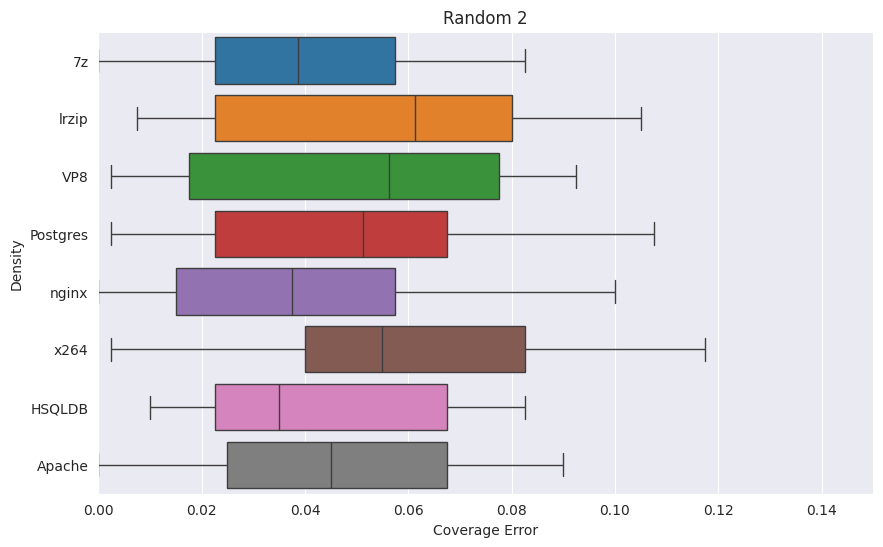

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Cov_err', y='System', hue='System', legend=False, fill=True, palette='tab10')
#sns.kdeplot(data=result_df, x='Cov_err', hue='System', fill=True, common_norm=False, palette='tab10', cut=0)

plt.xlim(0, 0.15)

# Titel und Beschriftungen
plt.title(f"{rename_strings(sampling)}")
plt.xlabel('Coverage Error')
plt.ylabel('Density')

plt.show()

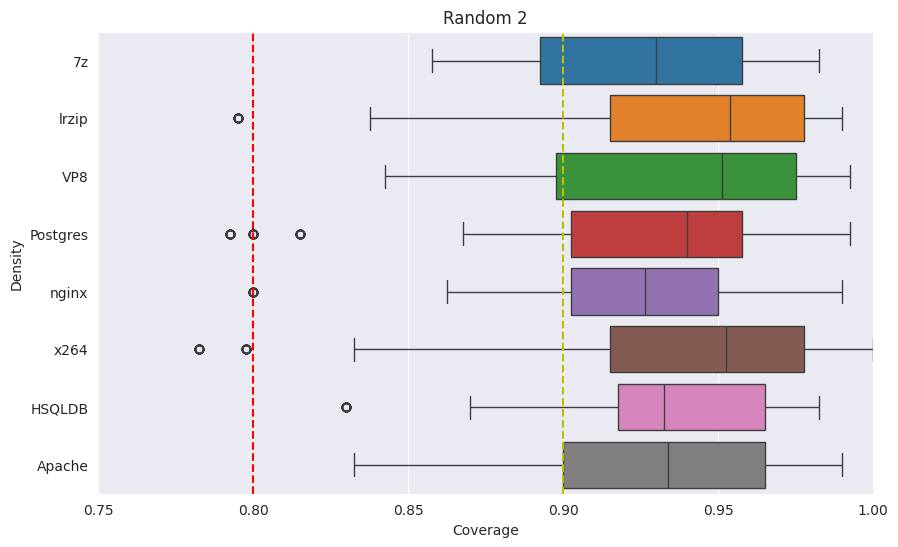

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=filtered_df, x='Coverage', y='System', hue='System', legend=False, fill=True, palette='tab10')
plt.xlim(0.75, 1)
ax.axvline(x=(1 - 2 * alpha), color='r', linestyle='--')
ax.axvline(x=(1 - alpha), color='y', linestyle='--')

# Titel und Beschriftungen
plt.title(f"{rename_strings(sampling)}")
plt.xlabel('Coverage')
plt.ylabel('Density')

plt.show()

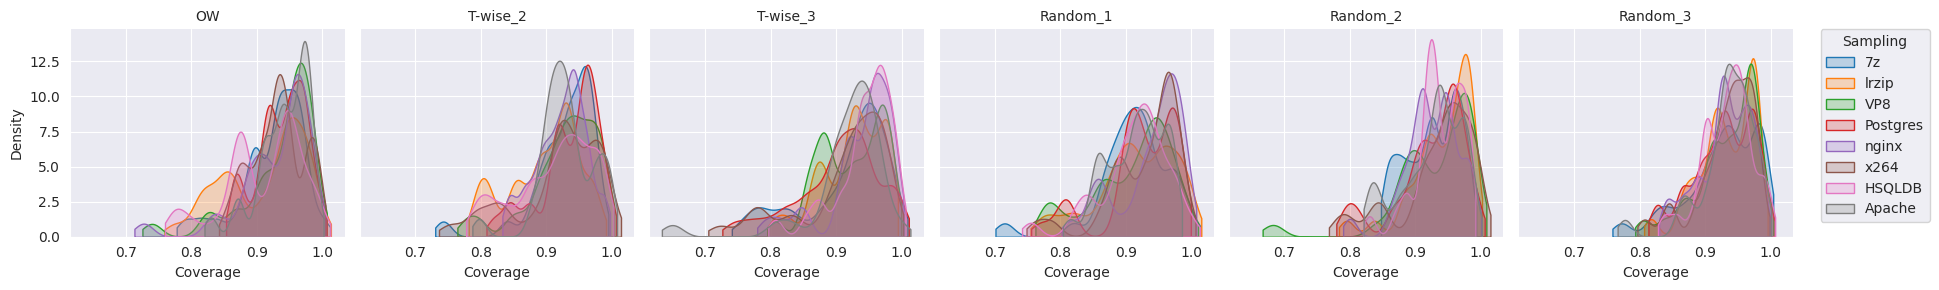

In [12]:
g = sns.FacetGrid(result_df, col='Sampling Strategie', hue="System")
g.map(sns.kdeplot, 'Coverage', fill=True, cut=1)
plt.legend(title='Sampling', bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0., frameon=True)
g.set_titles(col_template="{col_name}")

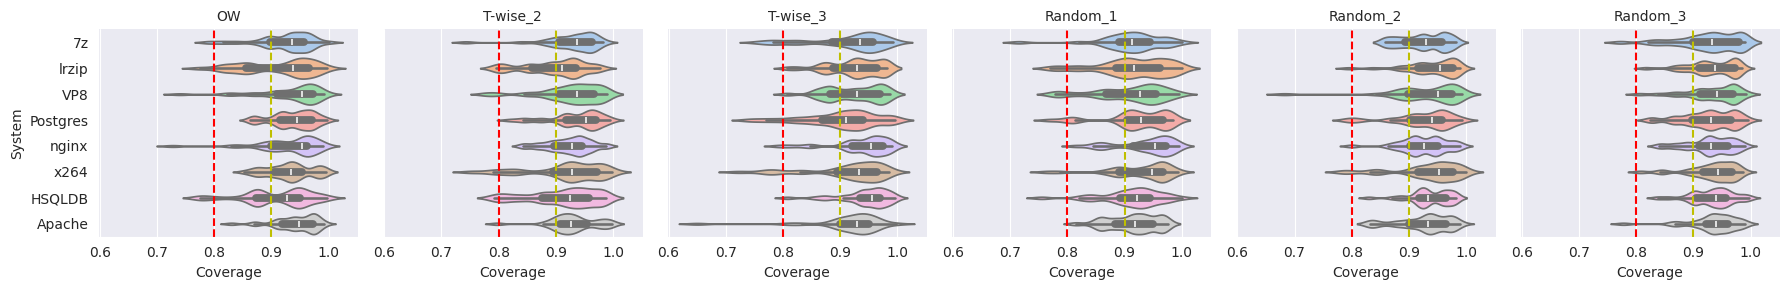

In [13]:
g = sns.FacetGrid(result_df, col='Sampling Strategie', height=3, aspect=1)
#g.map(sns.boxplot,data=result_df, hue='System', x='Coverage', palette='tab10')
#g.map_dataframe(sns.boxplot, x="Coverage", y="System", hue='System',legend=False, fill=True, palette='tab10')
g.map_dataframe(sns.violinplot, x="Coverage", y="System", hue='System', legend=False, fill=True, palette='pastel')
axes = g.axes.flatten()
g.set_titles(col_template="{col_name}")
# Hinzufügen von vertikalen Linien zu jedem Plot
for ax in axes:
    ax.axvline(x=(1 - 2 * alpha), color='r', linestyle='--')
    ax.axvline(x=(1 - alpha), color='y', linestyle='--')

g.savefig(os.path.join(exp_path, "twise-com-grid-cqr"), bbox_inches='tight')



In [14]:
result_df

,System,Cov_err,Coverage,Sampling Strategie
0,7z,0.0575,0.9575,OW
1,7z,0.0225,0.9225,OW
2,7z,0.0025,0.8975,OW
3,7z,0.0025,0.8975,OW
4,7z,0.0425,0.9425,OW
...,...,...,...,...
43195,Apache,0.0375,0.8625,Random_3
43196,Apache,0.0225,0.9225,Random_3
43197,Apache,0.0125,0.9125,Random_3
43198,Apache,0.0200,0.8800,Random_3


In [44]:
test_strategien = ["Random_1", "Random_2", "Random_3"]
filtered_df_test = result_df.loc[result_df["Sampling Strategie"].isin(test_strategien)]
filtered_df_test

,System,Cov_err,Coverage,Sampling Strategie
21600,7z,0.0650,0.9650,Random_1
21601,7z,0.0200,0.8800,Random_1
21602,7z,0.0775,0.9775,Random_1
21603,7z,0.0100,0.9100,Random_1
21604,7z,0.0350,0.8650,Random_1
...,...,...,...,...
43195,Apache,0.0375,0.8625,Random_3
43196,Apache,0.0225,0.9225,Random_3
43197,Apache,0.0125,0.9125,Random_3
43198,Apache,0.0200,0.8800,Random_3


In [45]:
import scipy.stats as stats
def check_normality(df, alpha=0.05):
    normality_results = {}
    for (system, strategy), group in df.groupby(['System', 'Sampling Strategie']):
        stat, p_value = stats.shapiro(group['Coverage'])
        normality_results[(system, strategy)] = {
            'stat': stat,
            'p_value': p_value,
            'normal': p_value > alpha
        }
    return normality_results

In [46]:
normality_results = check_normality(filtered_df_test)
print("Normality Results:", normality_results)

Normality Results: {('7z', 'Random_1'): {'stat': 0.8847162626011227, 'p_value': 2.5082652244882165e-25, 'normal': False}, ('7z', 'Random_2'): {'stat': 0.9265727537959906, 'p_value': 1.4807099148661136e-20, 'normal': False}, ('7z', 'Random_3'): {'stat': 0.9034521976644636, 'p_value': 2.1811184857884216e-23, 'normal': False}, ('Apache', 'Random_1'): {'stat': 0.9452784949624138, 'p_value': 9.868281903008764e-18, 'normal': False}, ('Apache', 'Random_2'): {'stat': 0.9092107313880569, 'p_value': 9.815342730453084e-23, 'normal': False}, ('Apache', 'Random_3'): {'stat': 0.8531501263354961, 'p_value': 4.171348957352458e-28, 'normal': False}, ('HSQLDB', 'Random_1'): {'stat': 0.9337435918126972, 'p_value': 1.5240127110553963e-19, 'normal': False}, ('HSQLDB', 'Random_2'): {'stat': 0.9163354774296041, 'p_value': 6.993670272892567e-22, 'normal': False}, ('HSQLDB', 'Random_3'): {'stat': 0.9622408926045164, 'p_value': 1.721381747292139e-14, 'normal': False}, ('Postgres', 'Random_1'): {'stat': 0.847472

In [47]:
i = 0
for x in normality_results:
    r = normality_results[x]
    if r['normal'] == True:
        i = i + 1
print(f"Anzahl Normalverteilt: {i}")

Anzahl Normalverteilt: 0


In [48]:
def kruskal_wallis_test(df, alpha=0.05):
    kruskal_results = {}
    num_tests = df['System'].nunique()  # Anzahl der unterschiedlichen Systeme
    corrected_alpha = alpha / num_tests  # Bonferroni-Korrektur

    for system, group in df.groupby('System'):
        strategies = group['Sampling Strategie'].unique()
        samples = [group[group['Sampling Strategie'] == strategy]['Coverage'] for strategy in strategies]
        stat, p_value = stats.kruskal(*samples)
        kruskal_results[system] = {
            'stat': stat,
            'p_value': p_value,
            'significant_difference': p_value <= corrected_alpha
        }
    return kruskal_results

In [49]:
kruskal_results = kruskal_wallis_test(filtered_df_test)
print("Kruskal-Wallis Results:", kruskal_results)

Kruskal-Wallis Results: {'7z': {'stat': 55.335127828967835, 'p_value': 9.64116830205779e-13, 'significant_difference': True}, 'Apache': {'stat': 113.46930722444642, 'p_value': 2.2932584557335473e-25, 'significant_difference': True}, 'HSQLDB': {'stat': 130.89913980797303, 'p_value': 3.763682223101889e-29, 'significant_difference': True}, 'Postgres': {'stat': 0.028901976935329008, 'p_value': 0.985652925908818, 'significant_difference': False}, 'VP8': {'stat': 111.47595573495894, 'p_value': 6.213034707717404e-25, 'significant_difference': True}, 'lrzip': {'stat': 99.7324217580577, 'p_value': 2.2048537206129696e-22, 'significant_difference': True}, 'nginx': {'stat': 77.27309301789158, 'p_value': 1.6609671811597798e-17, 'significant_difference': True}, 'x264': {'stat': 8.412346238454594, 'p_value': 0.014903292471088141, 'significant_difference': False}}


In [50]:
def kruskal_results_to_df(kruskal_results):
    results_df = pd.DataFrame([
        {'System': system, 'p_value': results['p_value']}
        for system, results in kruskal_results.items()
    ])
    return results_df

In [51]:
kruskal_df = kruskal_results_to_df(kruskal_results)

In [54]:
kruskal_df.to_csv(os.path.join(exp_path, "kruskal-cqr-random.csv"), sep=';', index=False)

In [55]:
def test_specific_pairs(df, alpha=0.05):
    # Definieren der Paare, die getestet werden sollen
    pairs = [
        ('OW', 'Random_1'),
        ('T-wise_2', 'Random_2'),
        ('T-wise_3', 'Random_3')
    ]

    results = []
    for system, group in df.groupby('System'):
        for strategy1, strategy2 in pairs:
            group1 = group[group['Sampling Strategie'] == strategy1]['Coverage']
            group2 = group[group['Sampling Strategie'] == strategy2]['Coverage']
            if not group1.empty and not group2.empty:
                stat, p_value = stats.kruskal(group1, group2)
                results.append({'System': system, 'Pair': f"{strategy1} vs {strategy2}", 'p_value': p_value})

    results_df = pd.DataFrame(results)
    # Anwenden der Bonferroni-Korrektur
    num_tests = len(pairs) * df['System'].nunique()
    corrected_alpha = alpha / num_tests
    results_df['significant_difference'] = results_df['p_value'] <= corrected_alpha
    return results_df

In [56]:
kruskal_df_2 = test_specific_pairs(result_df)

In [57]:
kruskal_df_2.to_csv(os.path.join(exp_path, "kruskal-cqr-pairs.csv"), sep=';', index=False)

In [58]:
kruskal_df_2

,System,Pair,p_value,significant_difference
0,7z,OW vs Random_1,1.433770e-10,True
1,7z,T-wise_2 vs Random_2,4.428559e-04,True
2,7z,T-wise_3 vs Random_3,3.728358e-02,False
3,Apache,OW vs Random_1,3.276246e-49,True
4,Apache,T-wise_2 vs Random_2,8.702381e-01,False
5,Apache,T-wise_3 vs Random_3,1.158674e-14,True
6,HSQLDB,OW vs Random_1,9.674283e-01,False
7,HSQLDB,T-wise_2 vs Random_2,1.052432e-13,True
8,HSQLDB,T-wise_3 vs Random_3,4.364952e-16,True
9,Postgres,OW vs Random_1,5.832422e-06,True
